In [1]:
import pandas as pd
import numpy as np
import os 

In [2]:
wines = pd.read_csv("winequality-red.csv")

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [5]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

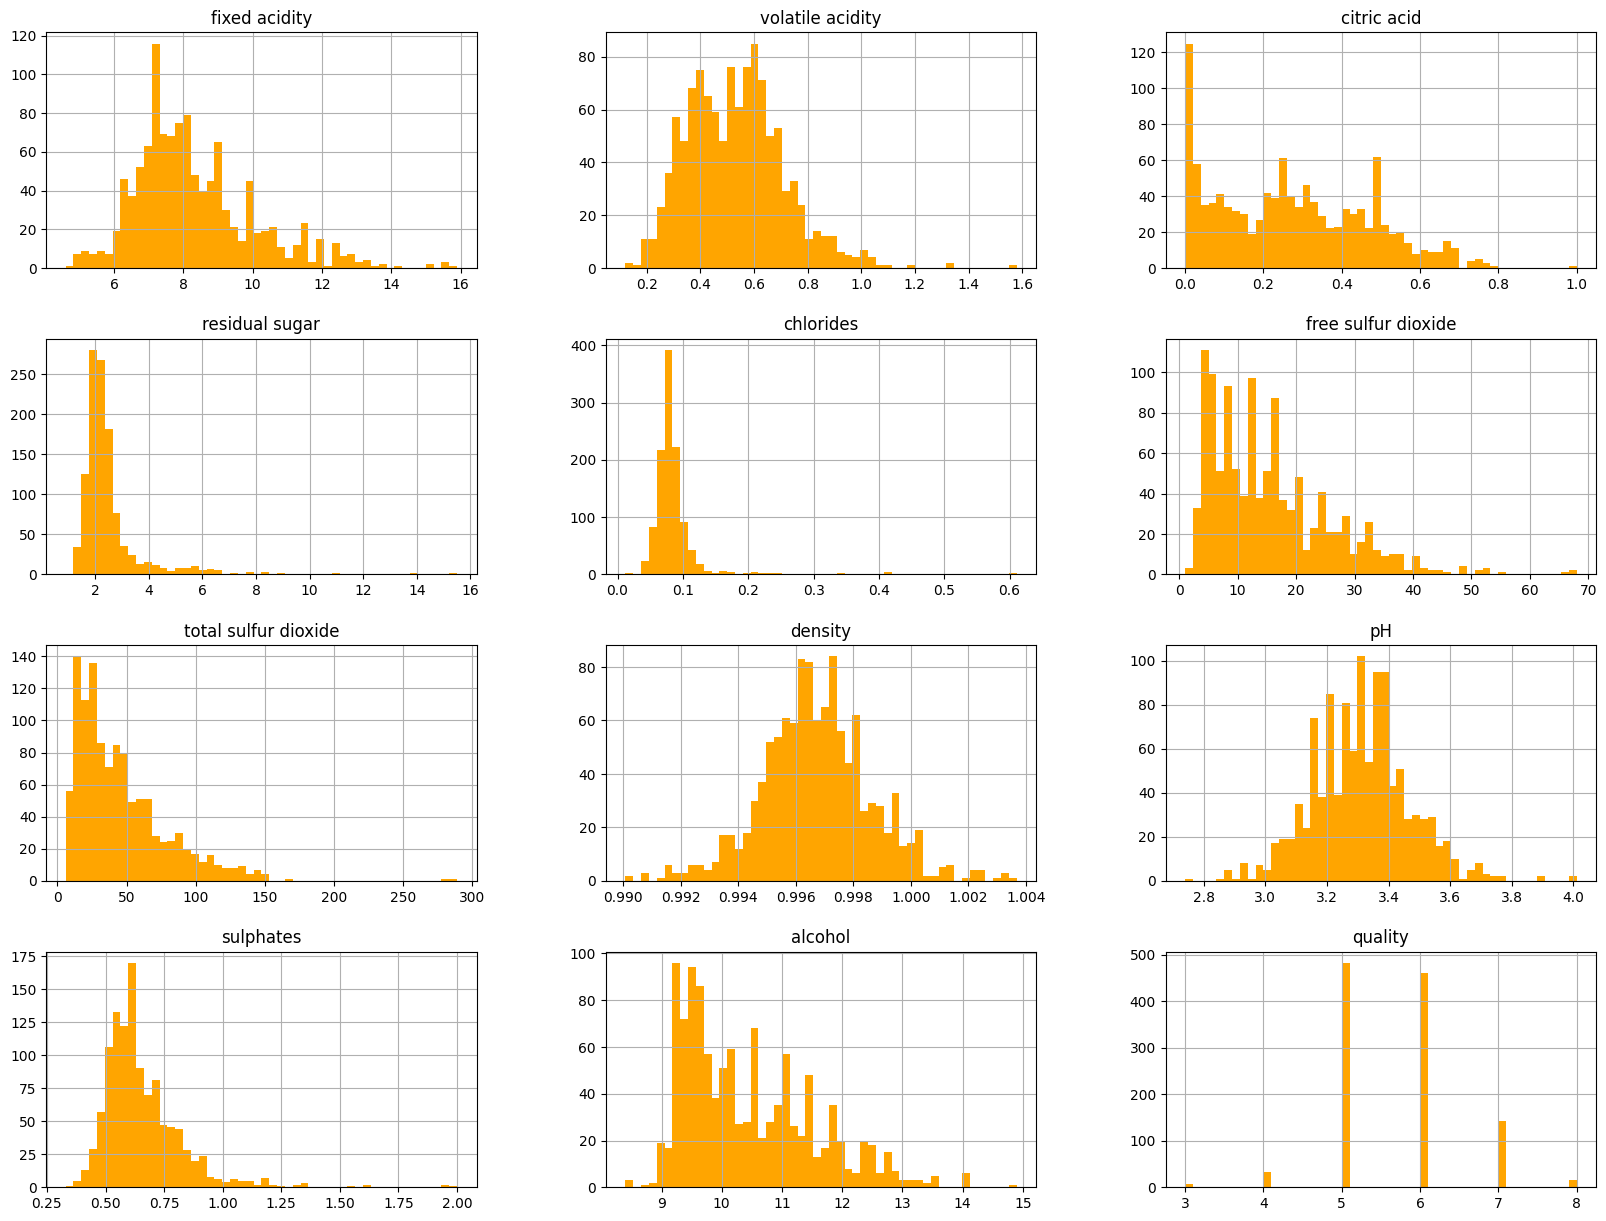

In [6]:
import matplotlib.pyplot as plt
wines.hist(bins=50,figsize=(20,15),color="orange")

fixed acidity:1.0435581570203705


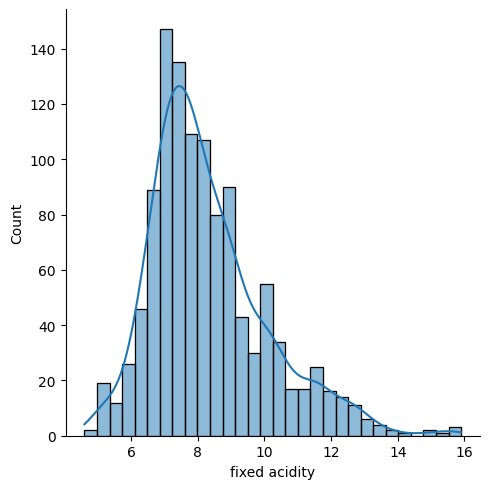

volatile acidity:0.6806526689497612


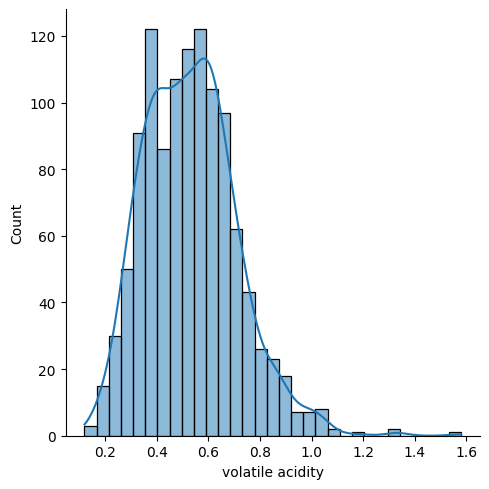

citric acid:0.3710729929318701


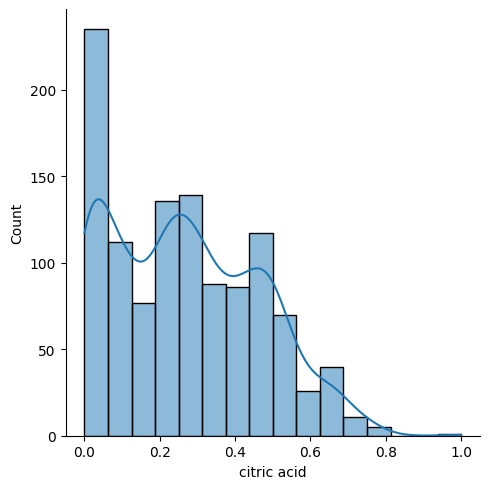

residual sugar:4.355371093085976


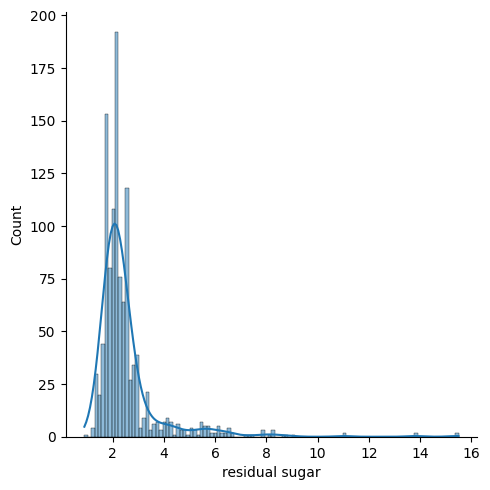

chlorides:6.018448660519523


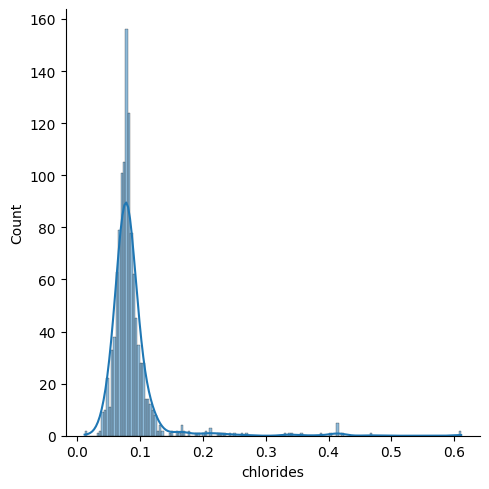

free sulfur dioxide:1.229644739026475


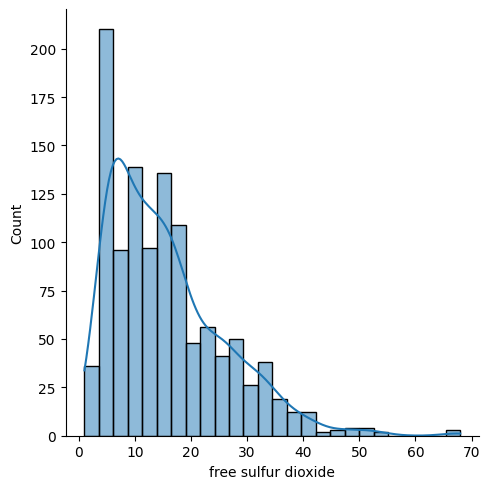

total sulfur dioxide:1.6635791721121174


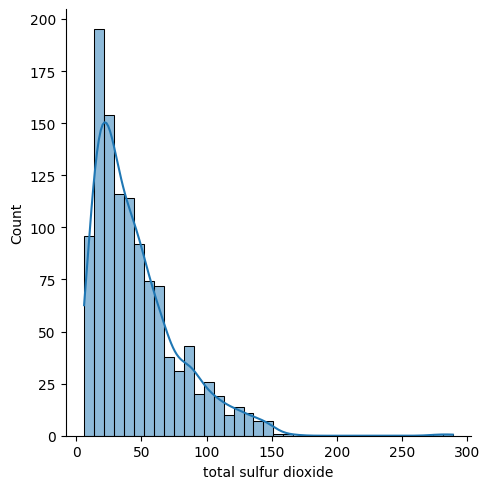

density:0.10226068292206784


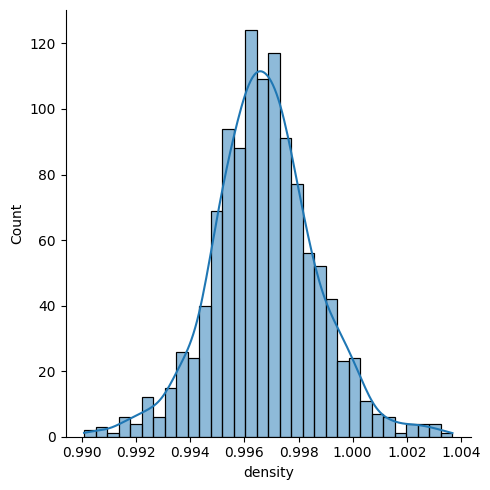

pH:0.22084807837665207


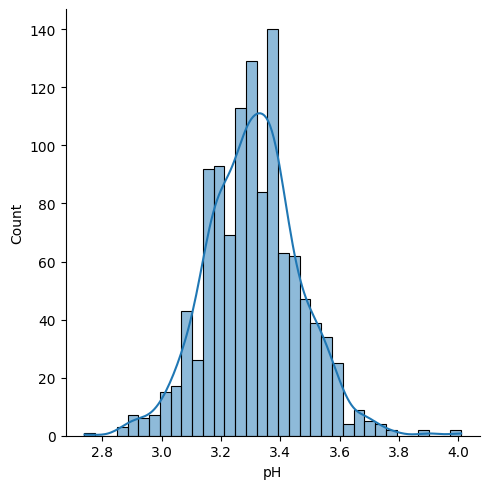

sulphates:2.4939876038821924


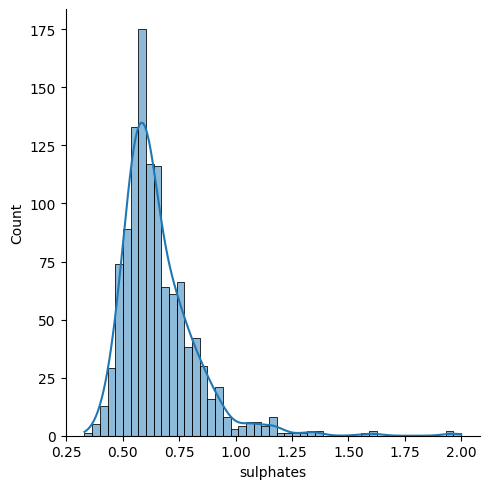

alcohol:0.8621798615040724


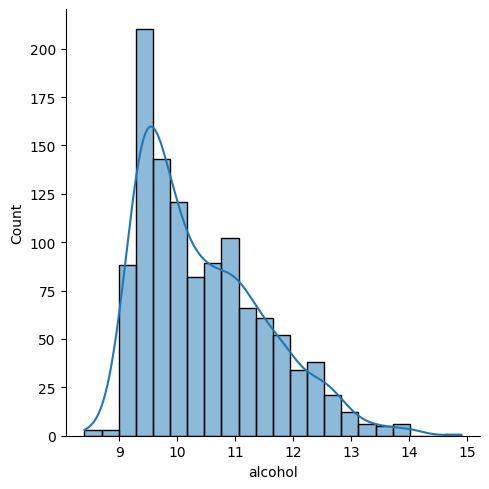

quality:0.2864151961088048


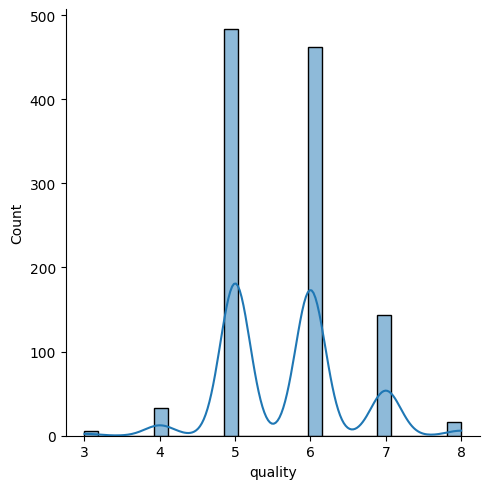

In [7]:
from scipy.stats import skew
import seaborn as sns
for col in wines:
    print(f"{col}:{skew(wines[col])}")
    sns.displot(wines[col],kde=True)
    plt.show()

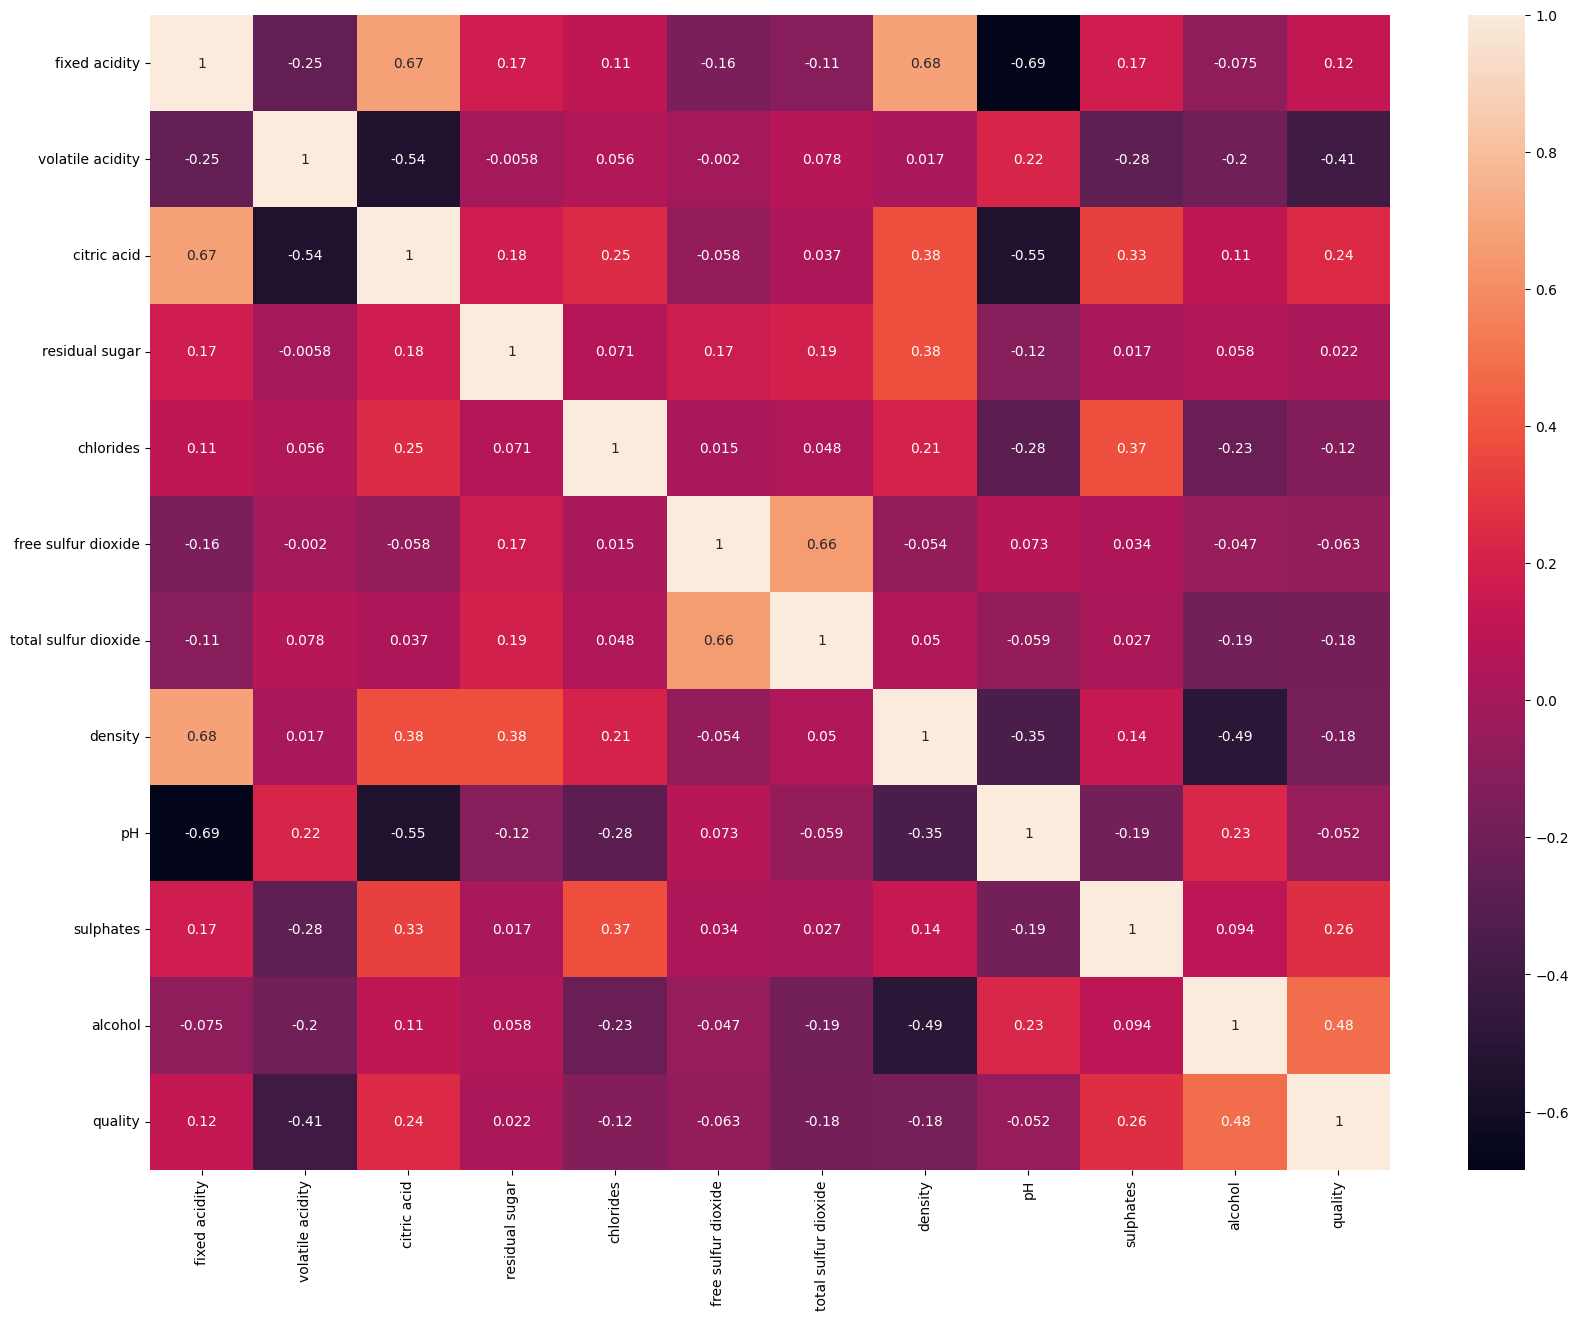

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(wines.corr(),annot=True)
plt.show()

In [9]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
##to remove skewness
#fixed acidity 
#volatile acidity
# residual sugar
# chlorides 
#free sulfur dioxide
#total sulfur dioxide
# sulphates
# alcohol
columns_to_transform=['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol']

wines[columns_to_transform] = wines[columns_to_transform].apply(np.log)

In [11]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,5
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,5
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,6
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5


In [12]:
X=wines.drop(['quality'],axis=1)
y=wines['quality']

In [13]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710


In [14]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
print(f"x_train shape:{x_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_test shape:{y_test.shape}")

x_train shape:(914, 11)
y_train shape:(914,)
x_test shape:(229, 11)
y_test shape:(229,)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
from sklearn.linear_model import ElasticNet
lr=ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(x_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [19]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score

In [20]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)
    
    return rmse,mae,r2

In [21]:
predicted = lr.predict(x_test)

In [22]:
eval_metrics(y_test,predicted)

(np.float64(0.6029659688721213),
 np.float64(0.4759752231912688),
 0.3466565906955633)

In [23]:
from sklearn.linear_model import LinearRegression as lreg
lr2=lreg()
lr2.fit(x_train,y_train)

LinearRegression()

In [24]:
predicted2 = lr2.predict(x_test)
eval_metrics(y_test,predicted2)

(np.float64(0.6022658536814121),
 np.float64(0.462386630232742),
 0.34817292863908)

In [25]:
import xgboost as xgb
# Initialize the XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
# Train the XGBoost model on the training data
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
predicted3=xg_reg.predict(x_test)
eval_metrics(y_test,predicted3)

(np.float64(0.5769379724829292),
 np.float64(0.4513671429396717),
 0.40184444189071655)

as rmse and mae of l3 are low and r2 of l3 is high this is the best model for our problem statement. Now we can train our actual model and do hyperparameter tuning.

In [27]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the model
actual_model = xgb.XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=actual_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit grid search
grid_search.fit(x_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score: -0.3920041704998329


In [28]:

# Initialize the final model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params)

# Train the final model on the full training dataset
best_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
predicted_best_model=best_model.predict(x_test)
eval_metrics(y_test,predicted_best_model)

(np.float64(0.5480719013461781),
 np.float64(0.44138651852003874),
 0.4602023959159851)